In [1]:
import numpy as np

In [2]:
in_arr = np.ones(shape=(3,3,5))*0.5

in_arr[::2,::2,::3] =0

In [3]:
in_arr.size

45

In [4]:
len(in_arr[in_arr!=0])

37

In [5]:
in_arr.shape

(3, 3, 5)

In [6]:
in_arr_lin = in_arr.ravel()
input_array = in_arr

In [7]:
list_array = []
for i in range(input_array.shape[0]):
    for j in range(input_array.shape[1]):
        for k in range(input_array.shape[2]):
            if input_array[i,j,k]!=0: list_array.append((i,j,k,input_array[i,j,k]))

In [8]:
list_array = np.array(list_array)

In [9]:
#Now how do we go from this to standard lattice?
#We need to know the lattice type.

list_np_array = np.array(list_array)

#Find number of steps required
min_x, min_y, min_z = [np.min(list_np_array[:,0]), np.min(list_np_array[:,1]), np.min(list_np_array[:,2])]
max_x, max_y, max_z = [np.max(list_np_array[:,0]), np.max(list_np_array[:,1]), np.max(list_np_array[:,2])]

#Find number of steps required
num_x_steps = (len(np.unique(list_np_array[:,0])))
num_y_steps = (len(np.unique(list_np_array[:,1])))
num_z_steps = (len(np.unique(list_np_array[:,2])))

atoms_array = np.zeros(shape=(num_x_steps, num_y_steps, num_z_steps))

for entry in list_array:
    x,y,z,c = entry
    factors = [(num_x_steps-1)/(max_x - min_x), (num_y_steps-1)/(max_y - min_y), (num_z_steps-1)/(max_z - min_z)]
    atoms_array[int(x*factors[0]), int(y*factors[1]), int(z*factors[2])] = c
    

In [10]:
lx, ly, lz = [2,2,2]
latt = {}
latt['box'] = ['bcc', lx, ly, lz]
latt['xyzs'] = []

# box dimensions in lattice units

# layer number
for iz in range(lz):
    # layer structure
    for iy in range(ly):
        for ix in range(lx):
            if ix+0.5 <=(lx-1) and iy+0.5<=(ly-1) and iz+0.5<=(lz-1):
                latt['xyzs'].append([ix+0.5, iy+0.5, iz+0.5, 1])
            latt['xyzs'].append([1*ix, 1*iy, 1*iz, 1])

In [11]:
xyz = np.array(latt['xyzs'])

xyz_arr = xyz[:,:3]

In [12]:
xyz_arr.shape

(9, 3)

In [13]:
xyz_arr

array([[0.5, 0.5, 0.5],
       [0. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 1. ],
       [0. , 1. , 1. ],
       [1. , 1. , 1. ]])

In [14]:
%matplotlib inline

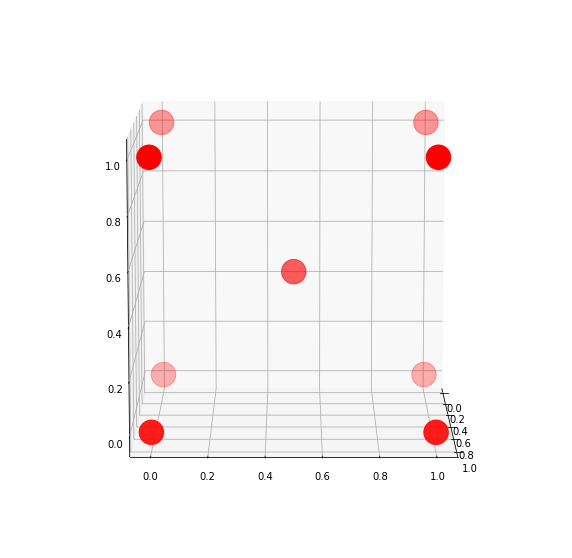

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(xyz_arr[:,0], xyz_arr[:,1], xyz_arr[:,2], c = 'red', s=600)

#ax.set_xlim([0,5])
#ax.set_ylim([0,5])
#ax.set_zlim([0,5])
ax.view_init(10, 0)
#ax.axis('square')

In [16]:
proper_bcc = [[0,0,0], [0,1,0], [0,0,1], [0,1,1], [1,0,0], [1,1,0], [1,0,1], [1,1,1], [0.5, 0.5, 0.5]]

proper_bcc = np.array(proper_bcc)

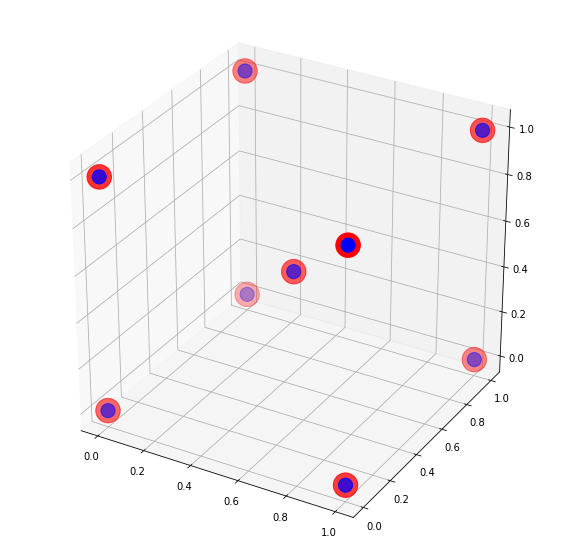

In [17]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(proper_bcc[:,0], proper_bcc[:,1], proper_bcc[:,2], c = 'red', s=600)
ax.scatter(xyz_arr[:,0], xyz_arr[:,1], xyz_arr[:,2], c = 'blue', s=200)
